# Predicting The Quality Of Wine

In [2]:
import numpy as np
import pandas as pd

In [4]:
rdata=pd.read_csv("C:/Users/aamal/OneDrive/Desktop/IOT/winequality.csv")
rdata.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
rdata.apply(lambda x: sum(x.isnull()),axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
rdata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Heatmaps

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(rdata.corr(),annot=True)

ImportError: No module named 'seaborn'

# Histograms

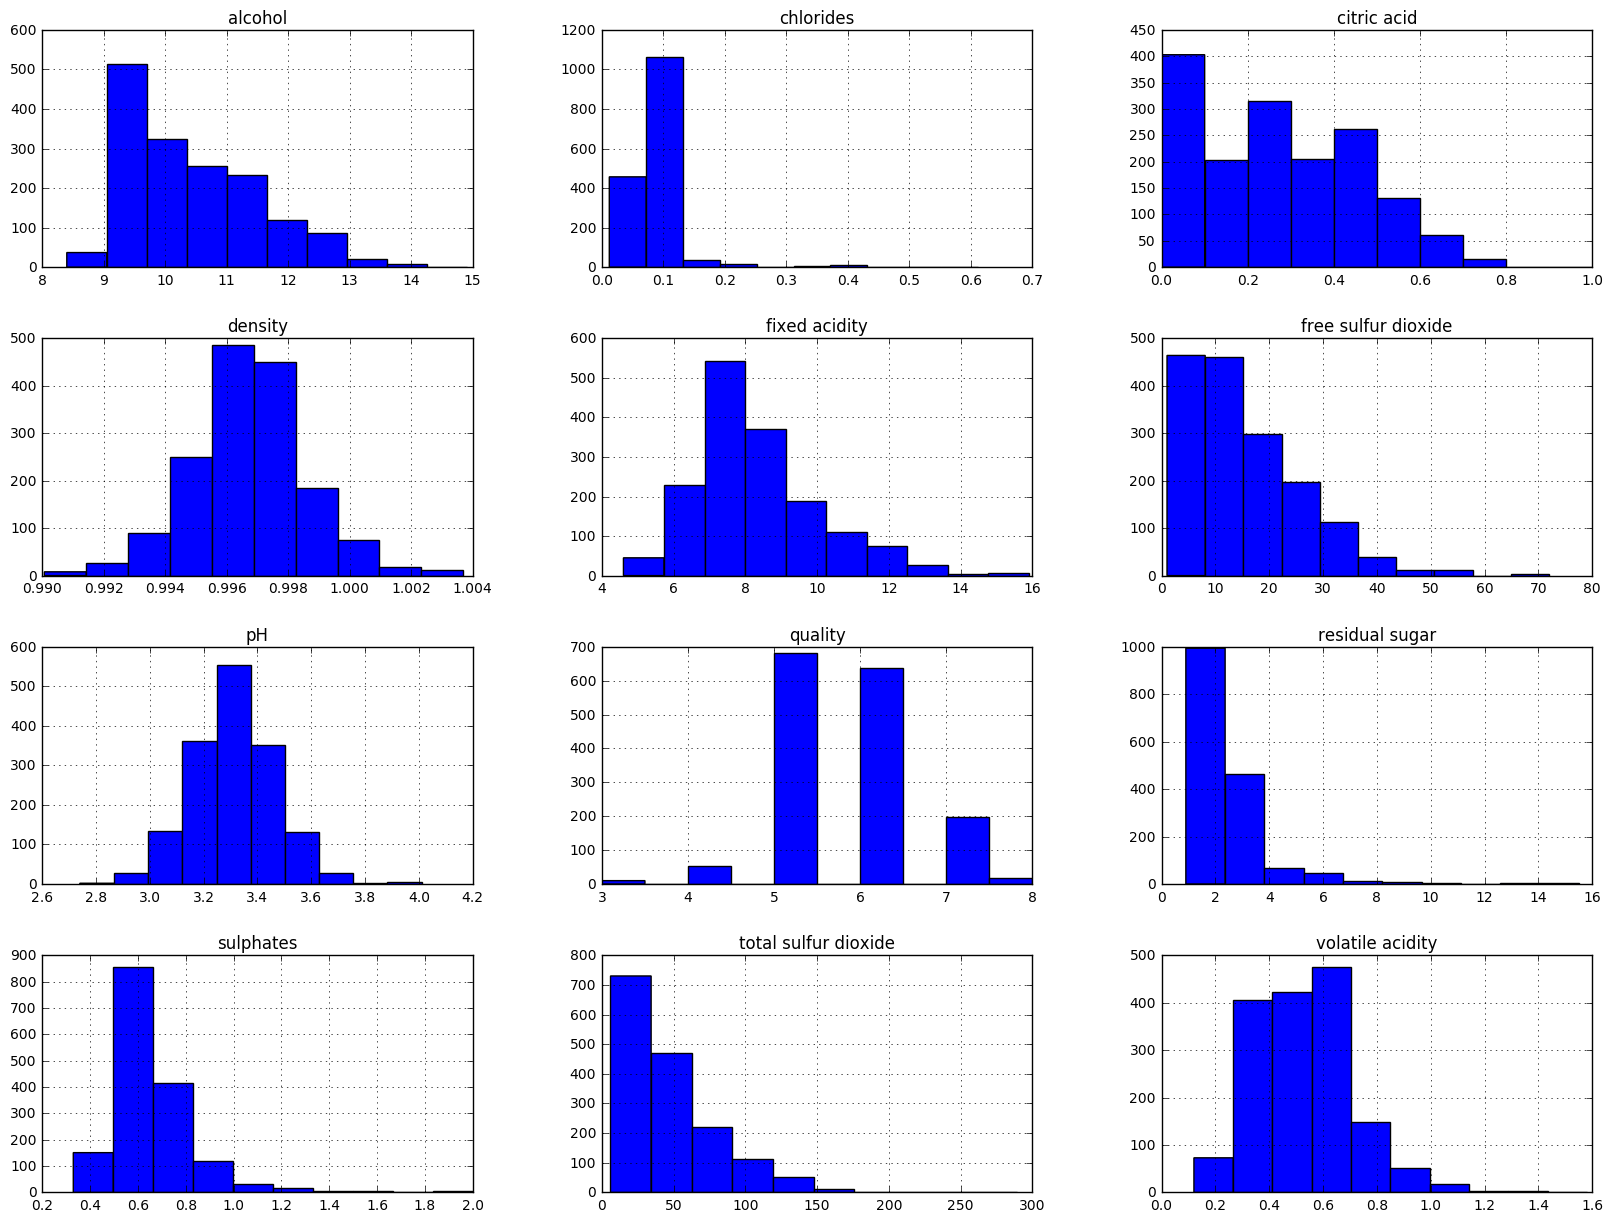

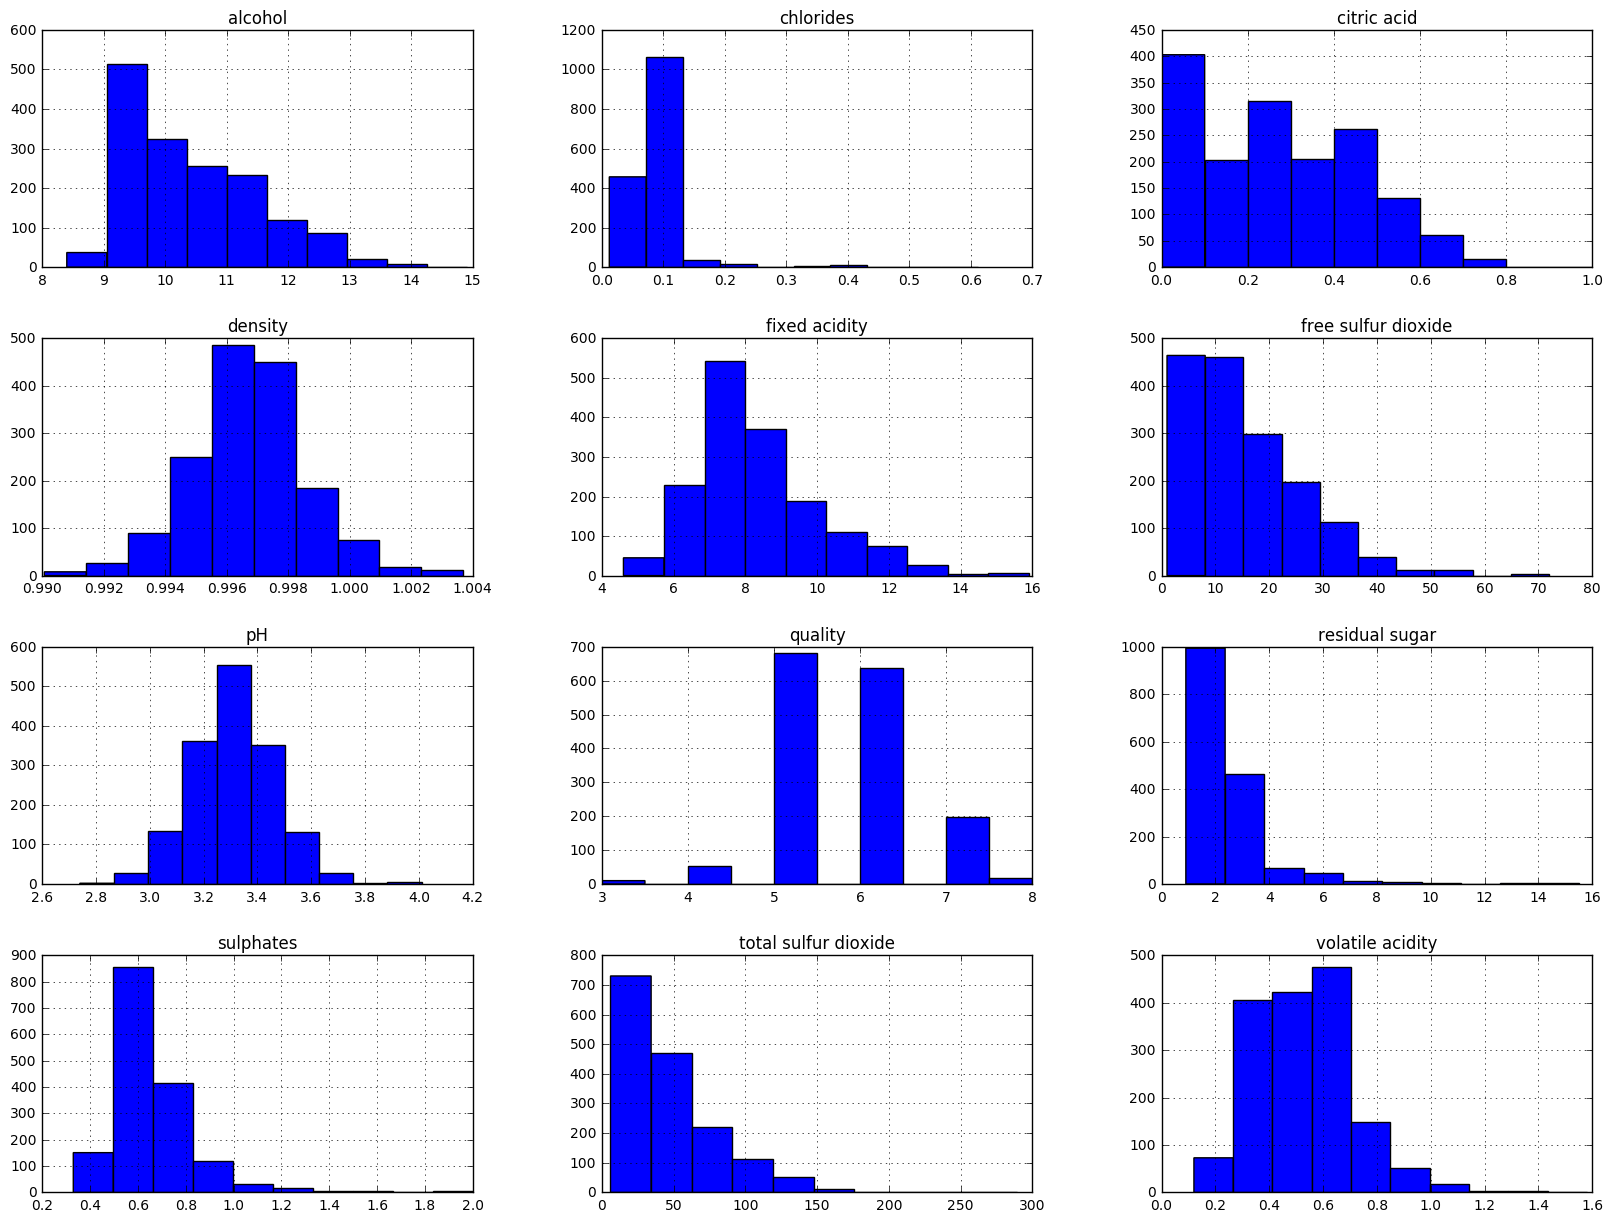

In [9]:
rdata.hist(figsize=(20,15))
plt.show()

In [10]:
rdata['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# Replacing The Values

In [11]:
rdata['quality'].replace([3,4,5,6,7,8],[0,0,0,1,1,1],inplace = True)#1 indiactes satisfactory
rdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [12]:
rdata['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [13]:
array=rdata.values
X=array[:,0:11]
y=array[:,11]

In [14]:
from sklearn.metrics import confusion_matrix

## KNeighbors Classifier

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
# train/test split
from sklearn.model_selection import train_test_split
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20, random_state=seed)
from sklearn.neighbors import KNeighborsClassifier

#seed =7

model = KNeighborsClassifier()
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)
# f1 score
score = f1_score(y_pred, y_test)
print("The Score for KNeighbors Classifier is:",score)
print("The Confusion Matrix for KNeighbors Classifier is:\n",confusion_matrix(y_pred,y_test))


The Score for KNeighbors Classifier is: 0.733695652174
The Confusion Matrix for KNeighbors Classifier is:
 [[ 87  52]
 [ 46 135]]


## Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lgc=LogisticRegression()
lgc.fit(X_train, y_train)
# predict
y_pred = lgc.predict(X_test)
# f1 score
score = f1_score(y_pred, y_test)
print("The Score for Logistic Regression is:",score)
print("The Confusion Matrix for Logistic Regression is:\n",confusion_matrix(y_pred,y_test))

The Score for Logistic Regression is: 0.774193548387
The Confusion Matrix for Logistic Regression is:
 [[134  47]
 [ 51 168]]


## Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20, random_state=0)
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# predict
y_pred = dtc.predict(X_test)
# f1 score
score = f1_score(y_pred, y_test)
print("The Score for Decision Tree Classifier is:",score)
print("The Confusion Matrix for Decision Tree Classifier is:\n",confusion_matrix(y_pred,y_test))


The Score for Decision Tree Classifier is: 0.778443113772
The Confusion Matrix for Decision Tree Classifier is:
 [[116  42]
 [ 32 130]]


## Random Forest Classification

In [21]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
seed = 45
num_trees = 57
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# random forest  Classifier
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)
# f1 score
score = f1_score(y_pred, y_test)
print("The Score for Random Forest Classification is:",score)
print("The Confusion Matrix for Random Forest Classification is:\n",confusion_matrix(y_pred,y_test))


The Score for Random Forest Classification is: 0.836363636364
The Confusion Matrix for Random Forest Classification is:
 [[144  31]
 [ 41 184]]


## Gaussian Naive Baye's

In [23]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
seed = 45
num_trees = 57
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_2 = gnb.predict(X_test)
score_2 = f1_score(y_pred_2, y_test)
print("The Score for Gaussian Naive Baye's is:",score)
print("The Confusion Matrix for Gaussian Naive Baye's is:\n",confusion_matrix(y_pred_2,y_test))


The Score for Gaussian Naive Baye's is: 0.836363636364
The Confusion Matrix for Gaussian Naive Baye's is:
 [[130  54]
 [ 55 161]]


# Prediction Output for a given value

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
seed = 45
num_trees = 57
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# random forest  Classifier
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, y_train)
# predict
y_pred = model.predict([[7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5]])
# f1 score

print("The Result is:")
print(y_pred)